<a href="https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/SegFormer/Segformer_inference_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/sithu31296/semantic-segmentation/blob/main/scripts/onnx_infer.py

### Create an onnx session

In [1]:
import onnxruntime as ort
import numpy as np

# Initialize the ONNX Runtime Inference Session
ort_session = ort.InferenceSession("segformer_b2_clothes.onnx")


In [101]:
input_details = ort_session.get_inputs()[0]
target_size = input_details.shape[-2:]
print(target_size)

mean = np.array([0.485, 0.456, 0.406]).reshape(-1, 1, 1)
std = np.array([0.229, 0.224, 0.225]).reshape(-1, 1, 1)

[512, 512]


In [102]:
import cv2
from PIL import Image

image_path = "../samples/man-with-clothes.jpg"

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Could not load image from {image_path}")

original_size = image.shape[:2]
print(original_size)

image_resized = cv2.resize(image, target_size)
image_transposed = np.transpose(image_resized, (2, 0, 1))  # HWC to CHW
image_normalized = image_transposed.astype(np.float32) / 255.0
image_normalized -= mean
image_normalized /= std

image_batch = image_normalized[np.newaxis, ...]
#image_batch = np.expand_dims(image_normalized, axis=0)  # Add batch dimension

print(image_batch.shape)

(1500, 1000)
(1, 3, 512, 512)


In [123]:
seg_map = ort_session.run(None, {input_details.name: image_batch})[0]

In [124]:
seg_map = np.argmax(seg_map, axis=1).astype(int)
# seg_map = palette[seg_map]
seg_map = seg_map.squeeze()

In [105]:
def ade_palette():
    """ADE20K palette that maps each class to RGB values."""
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


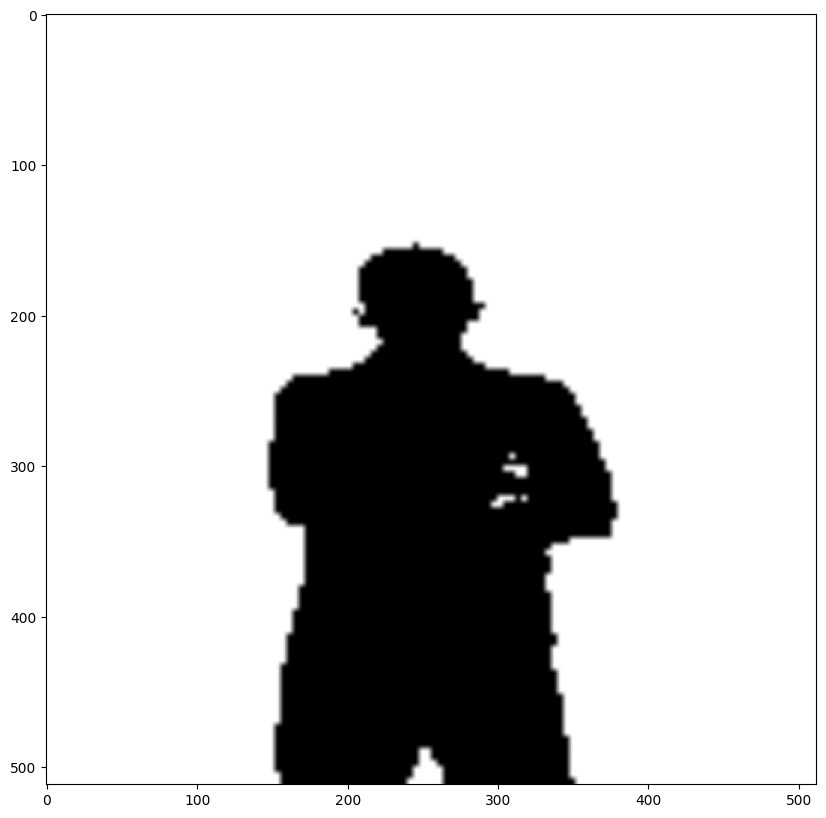

In [129]:
import matplotlib.pyplot as plt
import numpy as np

print(seg_map)

color_seg = np.zeros((seg_map.shape[0],
                      seg_map.shape[1], 3), dtype=np.uint8) # height, width, 3

palette = np.array(ade_palette())
for label, color in enumerate(palette):
    # color_seg[seg_map == label, :] = color
    color_seg[seg_map == 0, :] = [255,255,255]
# Convert to BGR
color_seg = color_seg[..., ::-1]

# Show image + mask
# img = cv2.resize(image_resized,seg_map.shape[::-1])
color_seg_resized = cv2.resize(color_seg, target_size, interpolation=cv2.INTER_LINEAR)
img = np.array(image_resized) * 0.5 + color_seg_resized * 0.5
img = img.astype(np.uint8)


plt.figure(figsize=(15, 10))
plt.imshow(color_seg_resized)
plt.show()